In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import json
import math
from shapely.geometry import shape
import geopandas as gpd


C:\Users\juan-\AppData\Local\Temp\ipykernel_21684\1959217670.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<Axes: >

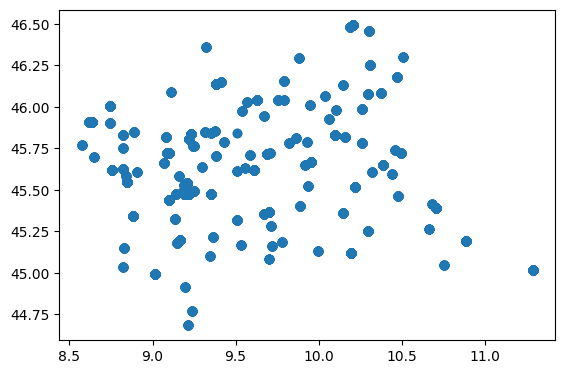

In [8]:
#url = "http://127.0.0.1:8000/api/collections/AirQualityMeasurement/items/?f=geojson&offset=0&limit=20000&bbox=10.010,45.312,10.048,45.719"
url = "http://127.0.0.1:8000/api/collections/MeteoMeasurement/items/?f=geojson&offset=0&limit=10000"
r = requests.get(url)
json_stations = r.json()
gdf = gpd.GeoDataFrame.from_features(json_stations['features'])
gdf['value'] = gdf['value'].astype(np.float64)
gdf.plot()

<Axes: xlabel='sensor_id'>

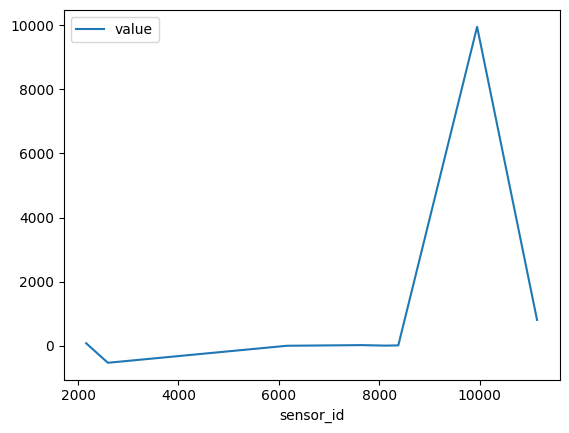

In [13]:
gdf.loc[gdf['value'] != -9999].describe().sort_values(by="sensor_id").plot(x='sensor_id', y='value')

In [93]:
gdf.sensor_id.unique()

array([5591, 6228], dtype=int64)

In [83]:
url_json = "http://127.0.0.1:8000/api/collections/AirQualityMeasurement/items/"
query = "f=json&offset=0&limit=10000&skipGeometry=false&datetime=2023-01-01/2023-02-28&sensor_id=6228"
url = f'{url_json}?{query}'
r = requests.get(url)
json_body = r.json()
from_json = pd.DataFrame(json_body)
from_json['value'] = from_json['value'].astype(np.float64)
from_json['date'] = pd.to_datetime(from_json['date']) 

In [84]:
from_json

,sensor_id,date,value,id
0,6228,2023-01-01 00:00:00,33.1,393479
1,6228,2023-01-01 01:00:00,33.6,393480
2,6228,2023-01-01 02:00:00,35.0,393481
3,6228,2023-01-01 03:00:00,31.0,393482
4,6228,2023-01-01 04:00:00,35.1,393483
...,...,...,...,...
1388,6228,2023-02-27 20:00:00,41.2,399027
1389,6228,2023-02-27 21:00:00,31.7,399028
1390,6228,2023-02-27 22:00:00,23.5,399029
1391,6228,2023-02-27 23:00:00,18.2,399030


<Axes: xlabel='date'>

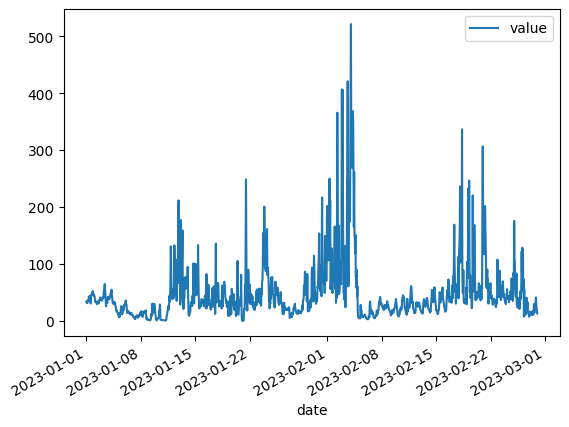

In [85]:
from_json.loc[from_json['value'] != -9999].sort_values(by='date').plot(y='value', x='date')

In [42]:
#url_json = "http://127.0.0.1:8000/api/collections/AirQualityMeasurement/items/?limit=1000"
url_geojson = "http://127.0.0.1:8000/api/collections/AirQualityMeasurement/items/"
query = "f=geojson&offset=0&limit=1000&skipGeometry=false&datetime=../..&sensor_id=6228"
url = f'{url_geojson}?{query}'
r = requests.get(url)

json_stations = r.json()
gdf = gpd.GeoDataFrame.from_features(json_stations['features'])
gdf

,geometry,sensor_id,date,value
0,POINT (10.04477 45.71630),6228,2023-01-01T00:00:00,33.1000
1,POINT (10.04477 45.71630),6228,2023-01-01T01:00:00,33.6000
2,POINT (10.04477 45.71630),6228,2023-01-01T02:00:00,35.0000
3,POINT (10.04477 45.71630),6228,2023-01-01T03:00:00,31.0000
4,POINT (10.04477 45.71630),6228,2023-01-01T04:00:00,35.1000
...,...,...,...,...
995,POINT (10.04477 45.71630),6228,2023-02-11T11:00:00,26.6000
996,POINT (10.04477 45.71630),6228,2023-02-11T12:00:00,26.5000
997,POINT (10.04477 45.71630),6228,2023-02-11T13:00:00,23.6000
998,POINT (10.04477 45.71630),6228,2023-02-11T14:00:00,22.9000


In [33]:
gdf.value.describe()


count           1000
unique           594
top       -9999.0000
freq              27
Name: value, dtype: object

<Axes: xlabel='value', ylabel='date'>

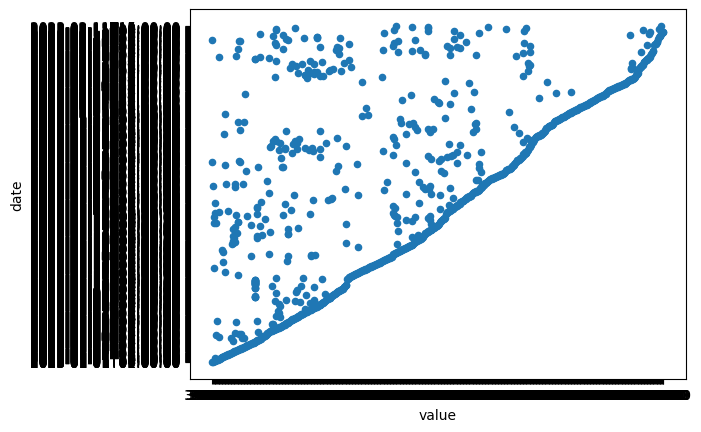

In [35]:
gdf.plot(kind="scatter", x="value", y="date")

In [24]:
url_json = "http://127.0.0.1:8000/api/collections/AirQualityMeasurement/items/?limit=100&offset=100&f=geojson"
r = requests.get(url_json)
json_stations = r.json()
gdf = gpd.GeoDataFrame.from_features(json_stations['features'])
gdf

,geometry,sensor_id,date,value
0,POINT (9.39995 45.86375),10286,2023-11-30T07:00:00,31.2000
1,POINT (9.39995 45.86375),10286,2023-11-30T08:00:00,37.9000
2,POINT (9.39995 45.86375),10286,2023-11-30T09:00:00,22.6000
3,POINT (9.39995 45.86375),10286,2023-11-30T10:00:00,16.3000
4,POINT (9.39995 45.86375),10286,2023-11-30T11:00:00,18.9000
...,...,...,...,...
95,POINT (10.23179 45.53953),6781,2023-01-17T21:00:00,-9999.0000
96,POINT (10.23179 45.53953),6781,2023-01-17T22:00:00,-9999.0000
97,POINT (10.23179 45.53953),6781,2023-01-17T23:00:00,-9999.0000
98,POINT (10.23179 45.53953),6781,2023-01-18T00:00:00,-9999.0000


In [5]:
r = requests.get("http://127.0.0.1:8000/api/collections/AirQualitySensor/items/")
json_stations = r.json()

gdf = gpd.GeoDataFrame.from_features(json_stations['features'])
gdf

,geometry,sensor_type,measurement_unit,station_id,station_name,altitude,province,comune,is_historical,date_start,date_stop,utm_north,utm_east,latitude,longitude
0,POINT (9.87921 46.16785),Ossidi di Azoto,µg/m³,1264,Sondrio v.Paribelli,290.0,SO,Sondrio,False,2008-11-11,None,5113073.0000,567873.0000,46.1679,9.8792
1,POINT (9.35166 45.84221),Ossidi di Azoto,µg/m³,679,Valmadrera v.Pozzi,247.0,LC,Valmadrera,False,2006-02-16,None,5076576.0000,527307.0000,45.8422,9.3517
2,POINT (9.07824 45.57172),Biossido di Azoto,µg/m³,540,Garbagnate Milanese v. Villoresi,175.0,MI,Garbagnate Milanese,True,1992-12-11,2018-07-30,5046467.0000,506105.0000,45.5717,9.0782
3,POINT (9.70079 45.08199),PM10 (SM2005),µg/m³,598,San Rocco al Porto v.Matteotti,50.0,LO,San Rocco al Porto,False,2002-01-01,None,4992297.0000,555154.0000,45.0820,9.7008
4,POINT (9.69815 45.15937),Biossido di Azoto,µg/m³,608,Codogno v.Trento,59.0,LO,Codogno,False,2000-01-13,None,5000892.0000,554872.0000,45.1594,9.6981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,POINT (9.87015 46.16797),PM10 (SM2005),µg/m³,569,Sondrio v.Mazzini,307.0,SO,Sondrio,False,None,None,5113078.0000,567173.0000,46.1680,9.8701
978,POINT (10.21121 45.54265),Monossido di Carbonio,mg/m³,1801,Brescia v.Tartaglia,151.0,BS,Brescia,False,2023-01-03,None,5043948.0000,594556.0000,45.5426,10.2112
979,POINT (10.38930 45.64605),Ozono,µg/m³,659,Odolo v.Praes,349.0,BS,Odolo,False,2023-01-03,None,5055661.0000,608260.0000,45.6461,10.3893
980,POINT (9.22178 45.80857),PM10 (SM2005),µg/m³,564,Erba v. Battisti,279.0,CO,Erba,False,None,None,5072803.0000,517232.0000,45.8086,9.2218


In [8]:
gdf

,geometry,sensor_type,measurement_unit,station_id,station_name,altitude,province,comune,is_historical,date_start,date_stop,utm_north,utm_east,latitude,longitude,pk
0,POINT (9.87921 46.16785),Ossidi di Azoto,µg/m³,1264,Sondrio v.Paribelli,290.0,SO,Sondrio,False,2008-11-11,None,5113073.0000,567873.0000,46.1679,9.8792,10431
1,POINT (9.35166 45.84221),Ossidi di Azoto,µg/m³,679,Valmadrera v.Pozzi,247.0,LC,Valmadrera,False,2006-02-16,None,5076576.0000,527307.0000,45.8422,9.3517,9968
2,POINT (9.07824 45.57172),Biossido di Azoto,µg/m³,540,Garbagnate Milanese v. Villoresi,175.0,MI,Garbagnate Milanese,True,1992-12-11,2018-07-30,5046467.0000,506105.0000,45.5717,9.0782,5543
3,POINT (9.70079 45.08199),PM10 (SM2005),µg/m³,598,San Rocco al Porto v.Matteotti,50.0,LO,San Rocco al Porto,False,2002-01-01,None,4992297.0000,555154.0000,45.0820,9.7008,20197
4,POINT (9.69815 45.15937),Biossido di Azoto,µg/m³,608,Codogno v.Trento,59.0,LO,Codogno,False,2000-01-13,None,5000892.0000,554872.0000,45.1594,9.6981,5611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,POINT (9.87015 46.16797),PM10 (SM2005),µg/m³,569,Sondrio v.Mazzini,307.0,SO,Sondrio,False,None,None,5113078.0000,567173.0000,46.1680,9.8701,20532
978,POINT (10.21121 45.54265),Monossido di Carbonio,mg/m³,1801,Brescia v.Tartaglia,151.0,BS,Brescia,False,2023-01-03,None,5043948.0000,594556.0000,45.5426,10.2112,20569
979,POINT (10.38930 45.64605),Ozono,µg/m³,659,Odolo v.Praes,349.0,BS,Odolo,False,2023-01-03,None,5055661.0000,608260.0000,45.6461,10.3893,20570
980,POINT (9.22178 45.80857),PM10 (SM2005),µg/m³,564,Erba v. Battisti,279.0,CO,Erba,False,None,None,5072803.0000,517232.0000,45.8086,9.2218,20572
